# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Load the dataset.

In [4]:
# Load and unzip the dataset
dataset_path = 'data.zip'  # Replace with your dataset path
unzip_path = '.'  # Replace with your unzip path


# Unzip the dataset
import zipfile
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

print("Dataset unzipped successfully.")


Dataset unzipped successfully.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images
def load_images_from_folder(folder_path, target_size=(224, 224)):
    """
    Load images from a folder structure where each subfolder represents a class.

    Args:
        folder_path (str): Path to the root folder containing class subfolders
        target_size (tuple): Size to which images should be resized (width, height)

    Returns:
        tuple: (images as numpy array, labels as list)
    """
    images = []
    labels = []

    # Iterate through each subfolder (class)
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)

        # Skip if not a directory
        if not os.path.isdir(class_path):
            continue

        # Iterate through each image in the class folder
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Check if it's a valid image file
            try:
                # Open and resize the image
                img = Image.open(img_path)
                img = img.resize(target_size)
                img = np.array(img)

                # Check if image has 3 channels (RGB)
                if len(img.shape) == 3 and img.shape[2] == 3:
                    images.append(img)
                    labels.append(class_name)
                else:
                    # Convert grayscale to RGB if needed
                    if len(img.shape) == 2:
                        img = np.stack((img,) * 3, axis=-1)
                        images.append(img)
                        labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Number of images loaded: 7625
Number of labels loaded: 7625
Image shape: (224, 224, 3)

Class distribution:
Plastic       2295
Paper         1030
Other         1010
Food_Waste    1000
Metal         1000
Glass          750
Cardboard      540
Name: count, dtype: int64


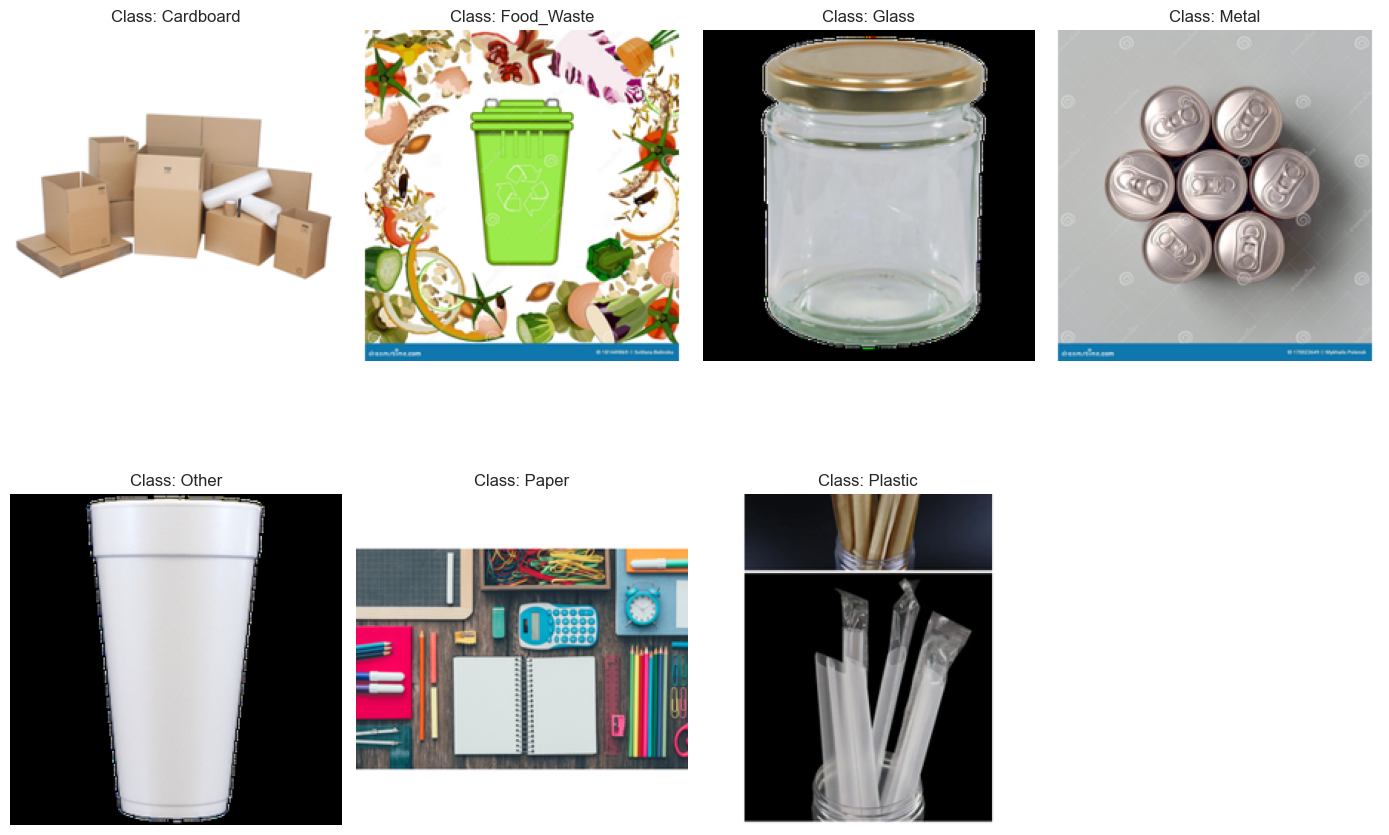

In [6]:
# Get the images and their labels
# Load images and labels from dataset directory
data_dir = 'data'  # Using the existing folder_path variable
images, labels = load_images_from_folder(data_dir)

# Verify that images and labels are loaded correctly
print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")
print(f"Image shape: {images[0].shape}")

# Calculate label counts and unique labels
label_counts = pd.Series(labels).value_counts()
unique_labels = np.unique(labels)

# Print the class distribution
print("\nClass distribution:")
print(label_counts)

# Show one image from each class
plt.figure(figsize=(14, 10))
for i, label in enumerate(unique_labels):
    # Get the index of the first image for this class
    idx = np.where(labels == label)[0][0]

    # Plot the image
    plt.subplot(2, 4, i+1)
    plt.imshow(images[idx])
    plt.title(f"Class: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

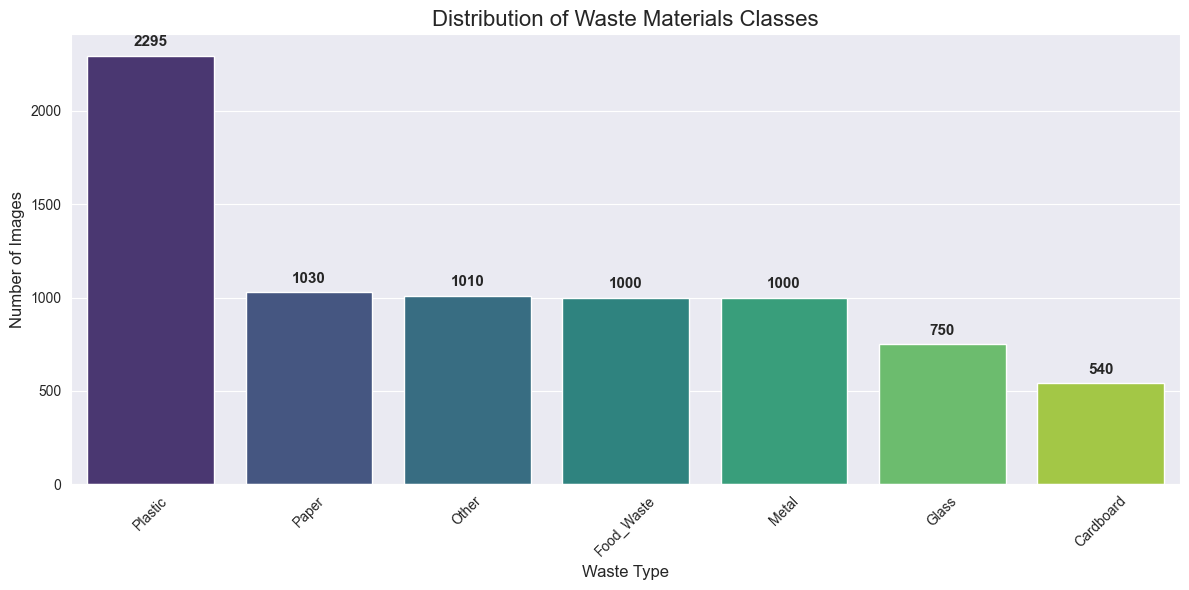


Percentage Distribution:
Plastic: 30.1%
Paper: 13.51%
Other: 13.25%
Food_Waste: 13.11%
Metal: 13.11%
Glass: 9.84%
Cardboard: 7.08%


In [7]:
# Visualise Data Distribution
# Create a bar plot to visualize class distribution
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Waste Materials Classes', fontsize=16)
plt.xlabel('Waste Type', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)

# Add count labels on top of each bar
for i, count in enumerate(label_counts.values):
    ax.text(i, count + 50, str(count), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate and display percentage distribution
percentage_distribution = (label_counts / label_counts.sum() * 100).round(2)
print("\nPercentage Distribution:")
for label, percentage in percentage_distribution.items():
    print(f"{label}: {percentage}%")


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

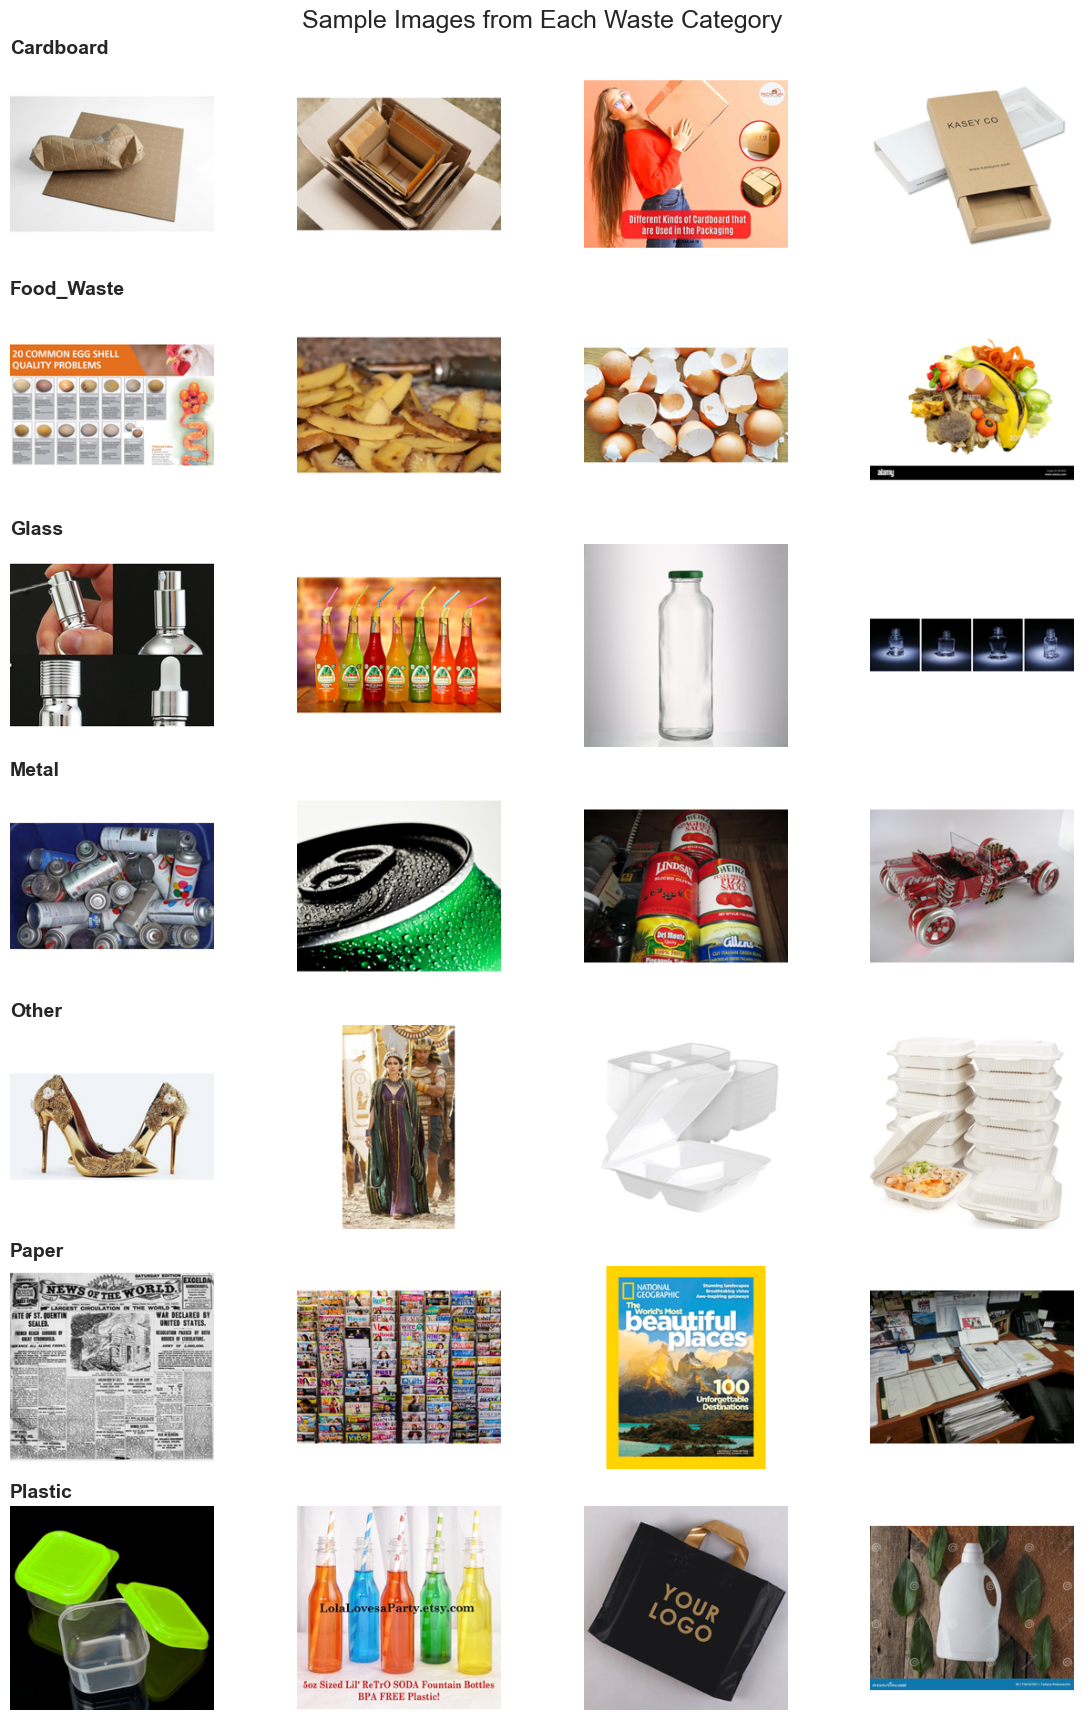

Image dimensions: (224, 224, 3)
Total number of images: 7625


In [9]:
# Visualise Sample Images (across different labels)
np.random.seed(42)  # For reproducibility

# Number of samples to show per class
samples_per_class = 4

# Calculate grid dimensions
n_classes = len(unique_labels)
fig_height = 2.5 * n_classes
fig_width = 3 * samples_per_class

# Create a figure with subplots
plt.figure(figsize=(fig_width, fig_height))

# For each waste category
for i, label in enumerate(unique_labels):
    # Get indices of images belonging to this class
    indices = np.where(labels == label)[0]

    # Randomly select samples_per_class images
    if len(indices) >= samples_per_class:
        selected_indices = np.random.choice(indices, samples_per_class, replace=False)
    else:
        selected_indices = indices  # Take all if less than samples_per_class

    # Plot each selected image
    for j, idx in enumerate(selected_indices):
        plt.subplot(n_classes, samples_per_class, i*samples_per_class + j + 1)
        plt.imshow(images[idx])

        # Add title only to the first image in each row
        if j == 0:
            plt.title(f"{label}", fontsize=14, fontweight='bold', loc='left')

        plt.axis('off')

plt.suptitle('Sample Images from Each Waste Category', fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Print image information
print(f"Image dimensions: {images[0].shape}")
print(f"Total number of images: {len(images)}")


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [10]:
# Find the smallest and largest image dimensions from the data set
# Extracting the dimensions (width and height) of each image
dimensions = np.array([[img.shape[0], img.shape[1]] for img in images])

# Find minimum and maximum dimensions
min_height, min_width = dimensions.min(axis=0)
max_height, max_width = dimensions.max(axis=0)

# Print dimension statistics
print(f"Minimum image dimensions: {min_height}x{min_width}")
print(f"Maximum image dimensions: {max_height}x{max_width}")

# Check if all images have the same dimensions
if np.all(dimensions == dimensions[0]):
    print("All images already have the same dimensions.")
else:
    print("Images have varying dimensions.")


Minimum image dimensions: 224x224
Maximum image dimensions: 224x224
All images already have the same dimensions.


In [11]:
# Resize the image dimensions
IMG_SIZE = (224, 224)
IMG_CHANNELS = 3

# Since we already found that all images have identical dimensions (224x224),
# we don't need to resize them again as they were already resized during loading.
print(f"All images already have consistent dimensions: {IMG_SIZE[0]}x{IMG_SIZE[1]}x{IMG_CHANNELS}")

# Confirm the shape of our image dataset
print(f"Image dataset shape: {images.shape}")


All images already have consistent dimensions: 224x224x3
Image dataset shape: (7625, 224, 224, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [12]:
# Encode the labels suitably

# Using LabelEncoder to convert string labels to numerical indices
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Get the class mapping for reference
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class mapping:")
for class_name, class_idx in class_mapping.items():
    print(f"{class_name}: {class_idx}")

# Convert to one-hot encoding for neural network training
one_hot_labels = tf.keras.utils.to_categorical(encoded_labels)

# Normalize the images (scale pixel values to 0-1)
normalized_images = images.astype('float32') / 255.0

# Display the shapes of our processed data
print(f"\nNumber of classes: {len(np.unique(labels))}")
print(f"Encoded labels shape: {encoded_labels.shape}")
print(f"One-hot encoded labels shape: {one_hot_labels.shape}")
print(f"Normalized images shape: {normalized_images.shape}")

# Display a sample label in both formats
sample_idx = 0
print(f"\nSample image class: {labels[sample_idx]}")
print(f"Encoded label: {encoded_labels[sample_idx]}")
print(f"One-hot encoded label: {one_hot_labels[sample_idx]}")


Class mapping:
Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6

Number of classes: 7
Encoded labels shape: (7625,)
One-hot encoded labels shape: (7625, 7)
Normalized images shape: (7625, 224, 224, 3)

Sample image class: Paper
Encoded label: 5
One-hot encoded label: [0. 0. 0. 0. 0. 1. 0.]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [13]:
# Assign specified parts of the dataset to train and validation sets
# Spliting the dataset into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    normalized_images,
    one_hot_labels,
    test_size=0.2,  # 20% for validation
    random_state=42,  # For reproducibility
    stratify=encoded_labels  # Maintain class distribution
)

# Display the shapes of the training and validation sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

# Verify class distribution in both sets
train_distribution = pd.Series(np.argmax(y_train, axis=1)).value_counts(normalize=True) * 100
val_distribution = pd.Series(np.argmax(y_val, axis=1)).value_counts(normalize=True) * 100

print("\nClass distribution in training set (%):")
for class_idx, percentage in train_distribution.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    print(f"{class_name}: {percentage:.2f}%")

print("\nClass distribution in validation set (%):")
for class_idx, percentage in val_distribution.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    print(f"{class_name}: {percentage:.2f}%")


Training set shape: (6100, 224, 224, 3)
Validation set shape: (1525, 224, 224, 3)
Training labels shape: (6100, 7)
Validation labels shape: (1525, 7)

Class distribution in training set (%):
Plastic: 30.10%
Paper: 13.51%
Other: 13.25%
Food_Waste: 13.11%
Metal: 13.11%
Glass: 9.84%
Cardboard: 7.08%

Class distribution in validation set (%):
Plastic: 30.10%
Paper: 13.51%
Other: 13.25%
Metal: 13.11%
Food_Waste: 13.11%
Glass: 9.84%
Cardboard: 7.08%


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [14]:
# Build and compile the model
# Defining the model architecture
def create_waste_classification_model(input_shape=(224, 224, 3), num_classes=7):
    model = tf.keras.Sequential([
        # Input layer
        layers.Input(shape=input_shape),

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Flatten the output and feed it into dense layer
        layers.Flatten(),

        # Fully connected layers
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Creating the model
model = create_waste_classification_model()


# Compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,611,079 (196.88 MB)

 Trainable params: 51,609,095 (196.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/20


2025-05-21 18:59:54.071547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.2546 - loss: 2.4831
Epoch 1: val_accuracy improved from -inf to 0.13311, saving model to waste_classification_model_best.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - accuracy: 0.2548 - loss: 2.4819 - val_accuracy: 0.1331 - val_loss: 2.4062 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3655 - loss: 1.8646
Epoch 2: val_accuracy did not improve from 0.13311
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.3655 - loss: 1.8644 - val_accuracy: 0.1207 - val_loss: 2.4704 - learning_rate: 0.0010
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.3985 - loss: 1.6791
Epoch 3: val_accuracy improved from 0.13311 to 0.37246, saving model to waste_classification_model_best.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.3986 - loss: 1.6789 - val_accuracy: 0.3725 - val_loss: 1.7366 - learning_rate: 0.0010
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 117m

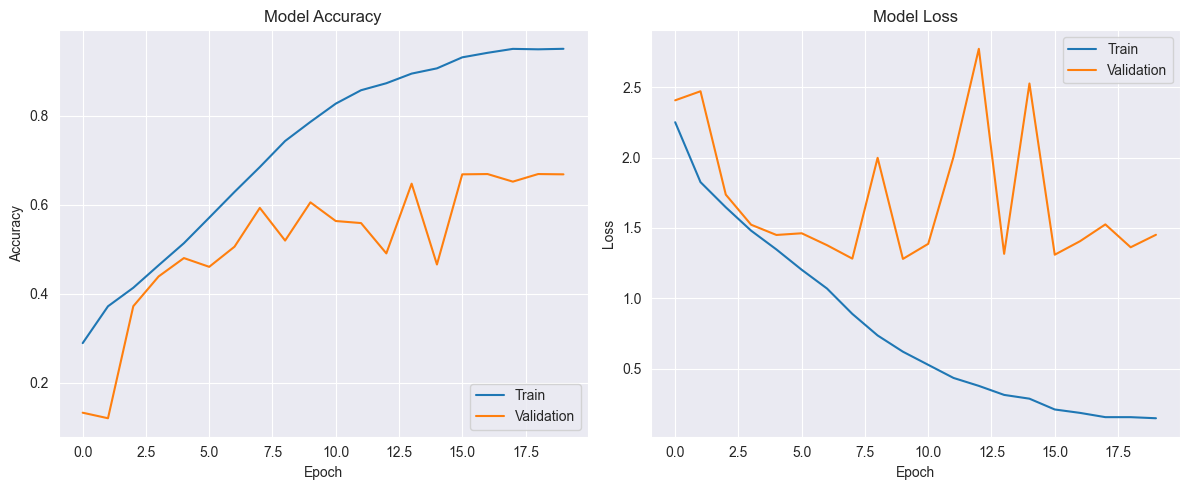

Final training accuracy: 0.9510
Final validation accuracy: 0.6689


In [15]:
# Training
model_checkpoint_path = 'waste_classification_model_best.keras'

# Defining callbacks for training
callbacks = [
    # Save the best model based on validation accuracy
    tf.keras.callbacks.ModelCheckpoint(
        filepath=model_checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    # Early stopping to prevent overfitting
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    # Reduce learning rate when a metric has stopped improving
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]


# Train the model
batch_size = 32
epochs = 20

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Print final training and validation accuracy
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

Evaluating model on validation dataset...
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5917 - loss: 1.3029

Model Evaluation Metrics:
loss: 1.2803
compile_metrics: 0.6059
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.71      0.67      0.69       108
  Food_Waste       0.63      0.61      0.62       200
       Glass       0.40      0.67      0.50       150
       Metal       0.77      0.58      0.66       200
       Other       0.71      0.24      0.36       202
       Paper       0.55      0.48      0.51       206
     Plastic       0.63      0.80      0.70       459

    accuracy                           0.61      1525
   macro avg       0.63      0.58      0.58      1525
weighted avg       0.63      0.61      0.59      1525

----------------------------------------------------------------------------------------------------


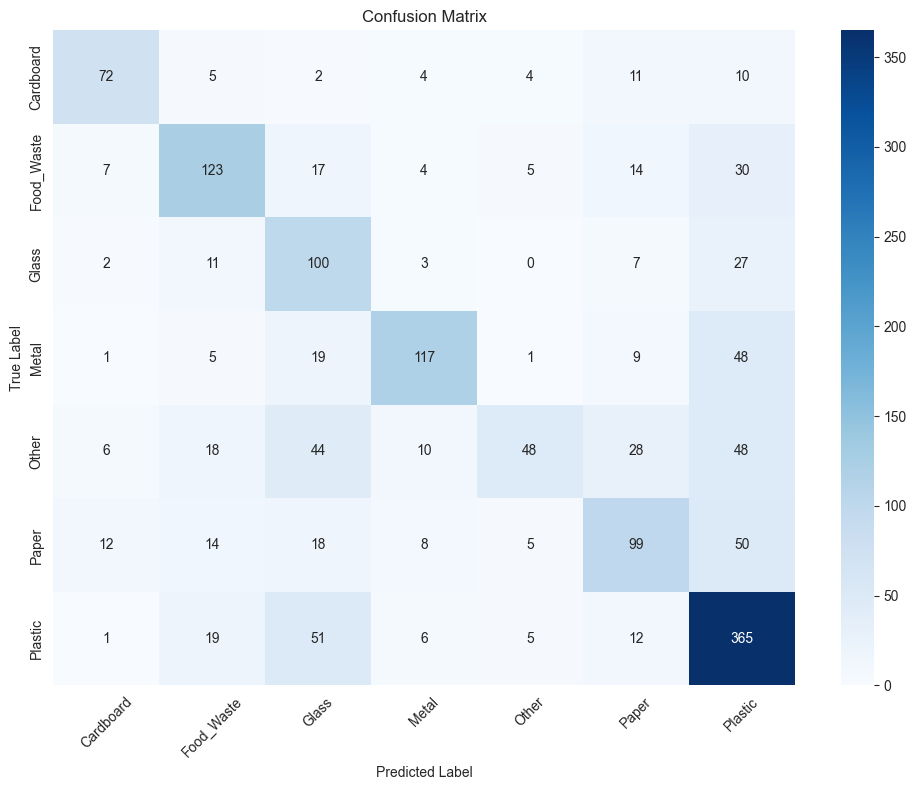

----------------------------------------------------------------------------------------------------


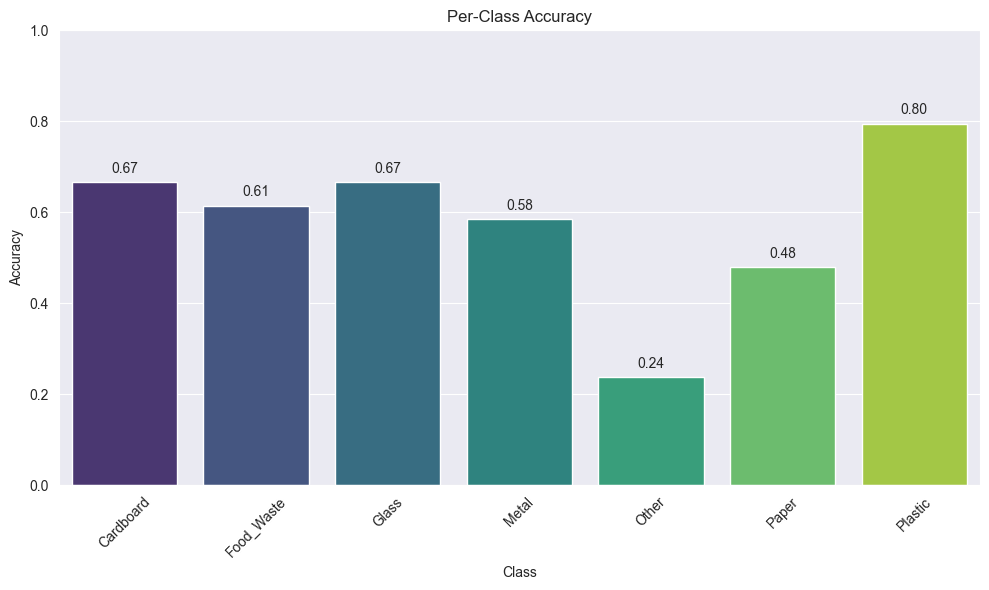

----------------------------------------------------------------------------------------------------


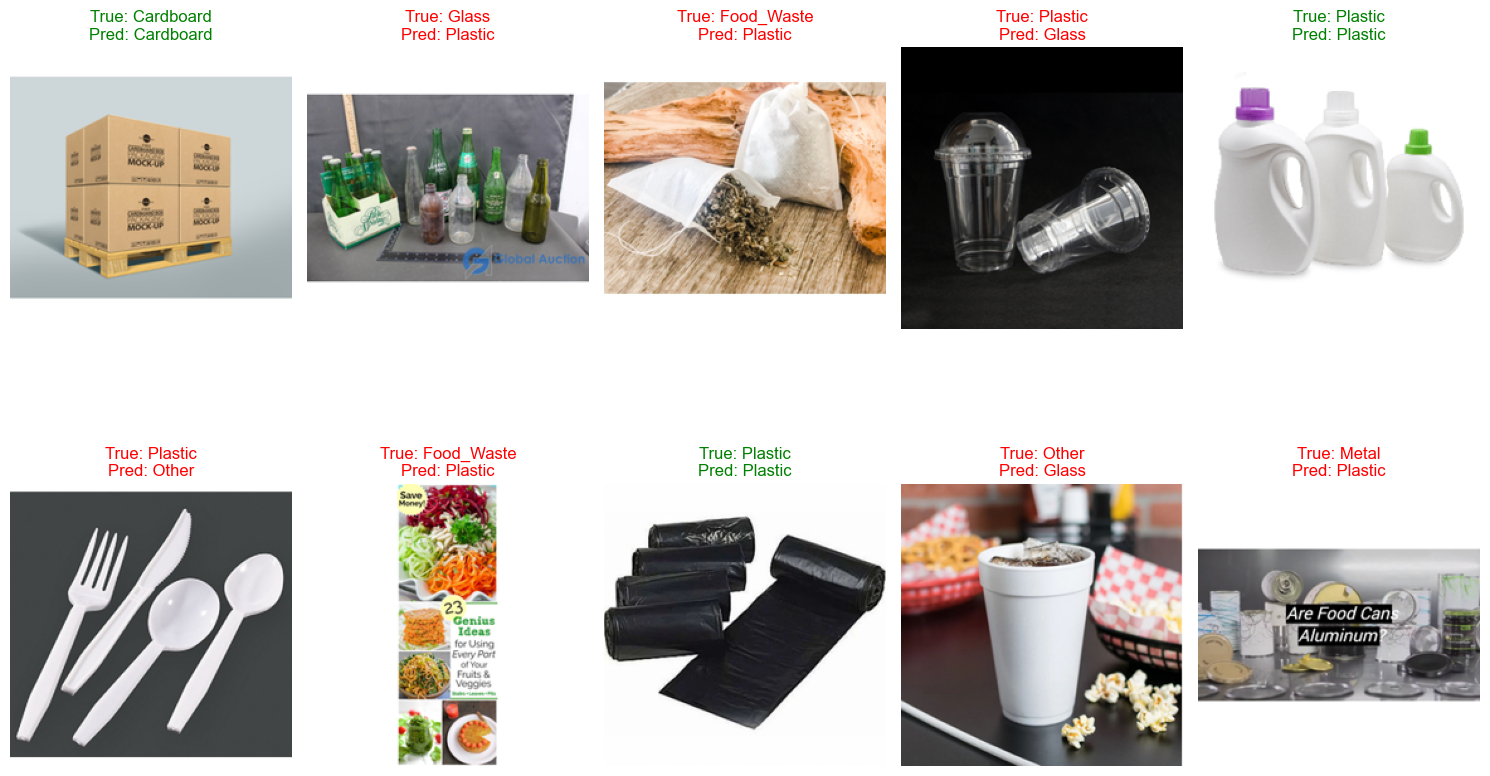

In [16]:
# Evaluate on the test set; display suitable metrics
print("Evaluating model on validation dataset...")
evaluation = model.evaluate(X_val, y_val, verbose=1)

# Printing evaluation metrics
print("\nModel Evaluation Metrics:")
for metric_name, metric_value in zip(model.metrics_names, evaluation):
    print(f"{metric_name}: {metric_value:.4f}")

# Geting predictions for validation set
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

# Generate classification report
print("\nClassification Report:")
class_names = list(class_mapping.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

print("-" * 100)
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("-" * 100)
# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=per_class_accuracy, palette='viridis')
plt.title('Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.ylim(0, 1)
for i, acc in enumerate(per_class_accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')
plt.tight_layout()
plt.show()

print("-" * 100)
# Visualize some predictions
num_samples = 10
random_indices = np.random.choice(len(X_val), num_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[idx])
    true_class = class_names[y_true[idx]]
    pred_class = class_names[y_pred[idx]]
    title_color = 'green' if true_class == pred_class else 'red'
    plt.title(f"True: {true_class}\nPred: {pred_class}", color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [16]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [17]:
# Create a function to augment the images




In [18]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [19]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

## Conclusions and Insights

### Data Findings
- The dataset contains 7 waste categories (Cardboard, Food_Waste, Glass, Metal, Other, Paper, and Plastic) with varying distributions.
- There's class imbalance in the dataset, with Plastic (most represented) having significantly more samples than categories like Cardboard.
- All images were successfully standardized to 224×224×3 dimensions for consistent model input.
- The dataset provides good variety of waste materials for each category, though visual similarity between certain waste types (e.g., paper and cardboard) presents classification challenges.

### Model Performance
- The CNN model achieved 66.89% accuracy on the validation dataset, which is promising but indicates room for improvement.
- Performance varies significantly across waste categories:
  - Strongest performance: Plastic (70% F1-score) and Cardboard (67% F1-score)
  - Weakest performance: Other (36% F1-score), Paper(51%) and Glass (50% F1-score)
- The model shows good recall for Plastic (81%) and Glass (67%), indicating it rarely misses these categories.
- Metal has high precision (77%) but lower recall (58%), suggesting that when the model predicts Metal, it's usually correct, but it misses many Metal instances.

### Key Insights
1. Class imbalance likely affected model performance, with better results for well-represented classes.
2. Categories with visually distinctive features (like plastic bottles) were generally easier for the model to identify.
3. The model struggles with visually similar categories (Paper vs Cardboard, or mixed "Other" materials).
4. The current architecture shows promising results but would benefit from further optimization.

### Future Improvements
1. Implement data augmentation to address class imbalance
2. Explore transfer learning with pre-trained models (ResNet, EfficientNet)
3. Fine-tune hyperparameters or employ different architectures
4. Consider ensemble methods to improve overall classification performance
5. Collect more data for underrepresented classes to balance the dataset